In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, LSTM
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('Dataset.csv')
data
# parse_dates=True,index_col='Date'

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


In [3]:
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [4]:
data['Turnover (Lacs)'].sum()

7936460.45

In [5]:
data['Close'].min()

80.95

In [6]:
data['Close'].max()

325.75

# Statistical Analaysis 

In [7]:
Start_date = data.index.min()
Last_date = data.index.max()

print(Start_date)
print(Last_date)

0
2034


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [9]:
data.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


# Data Proprocessing 

### Duplicates

In [10]:
data.duplicated().sum()

0

### Null Values

In [11]:
data.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

<Axes: >

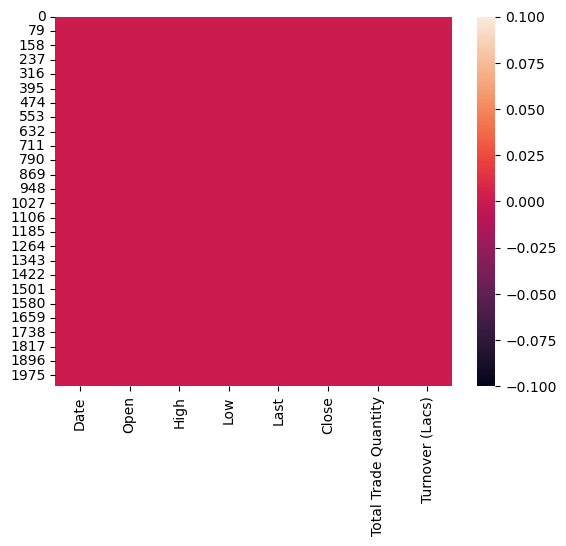

In [12]:
sns.heatmap(data.isnull())

### Outliers 

[Text(0, 0, 'Open'),
 Text(1, 0, 'High'),
 Text(2, 0, 'Low'),
 Text(3, 0, 'Last'),
 Text(4, 0, 'Close'),
 Text(5, 0, 'Total Trade Quantity'),
 Text(6, 0, 'Turnover (Lacs)')]

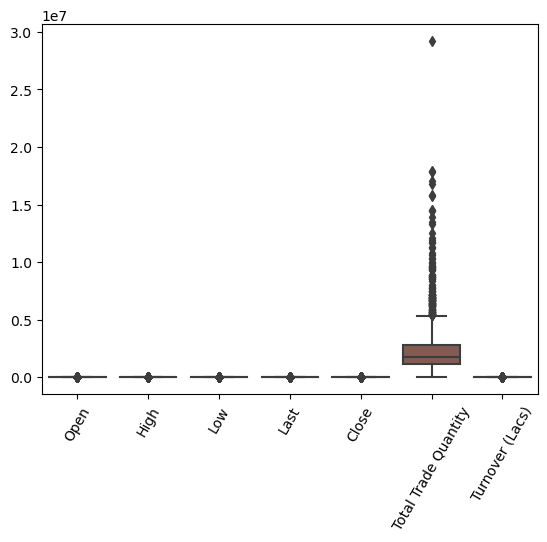

In [13]:
all = sns.boxplot(data=data)
all.set_xticklabels(all.get_xticklabels(),rotation=60)

Total Trade Quantity    Axes(0.125,0.53;0.352273x0.35)
dtype: object

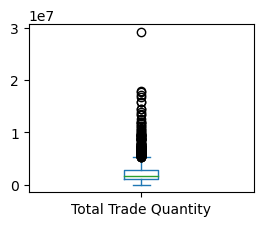

In [14]:
data['Total Trade Quantity'].plot(kind='box', subplots=True,layout=(2,2))

Text(0.5, 1.0, "['Total Trade Quantity']")

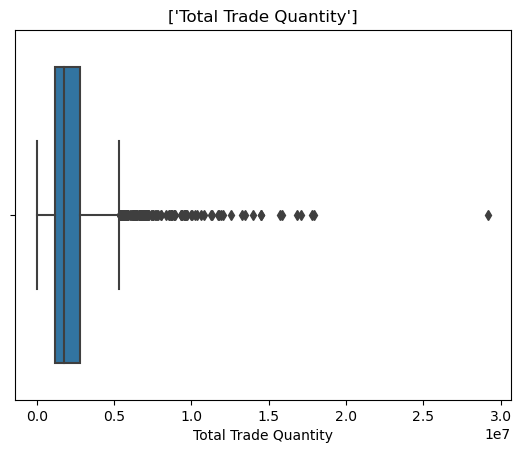

In [15]:
sns.boxplot(data=data,x=data['Total Trade Quantity'])
plt.title(["Total Trade Quantity"])

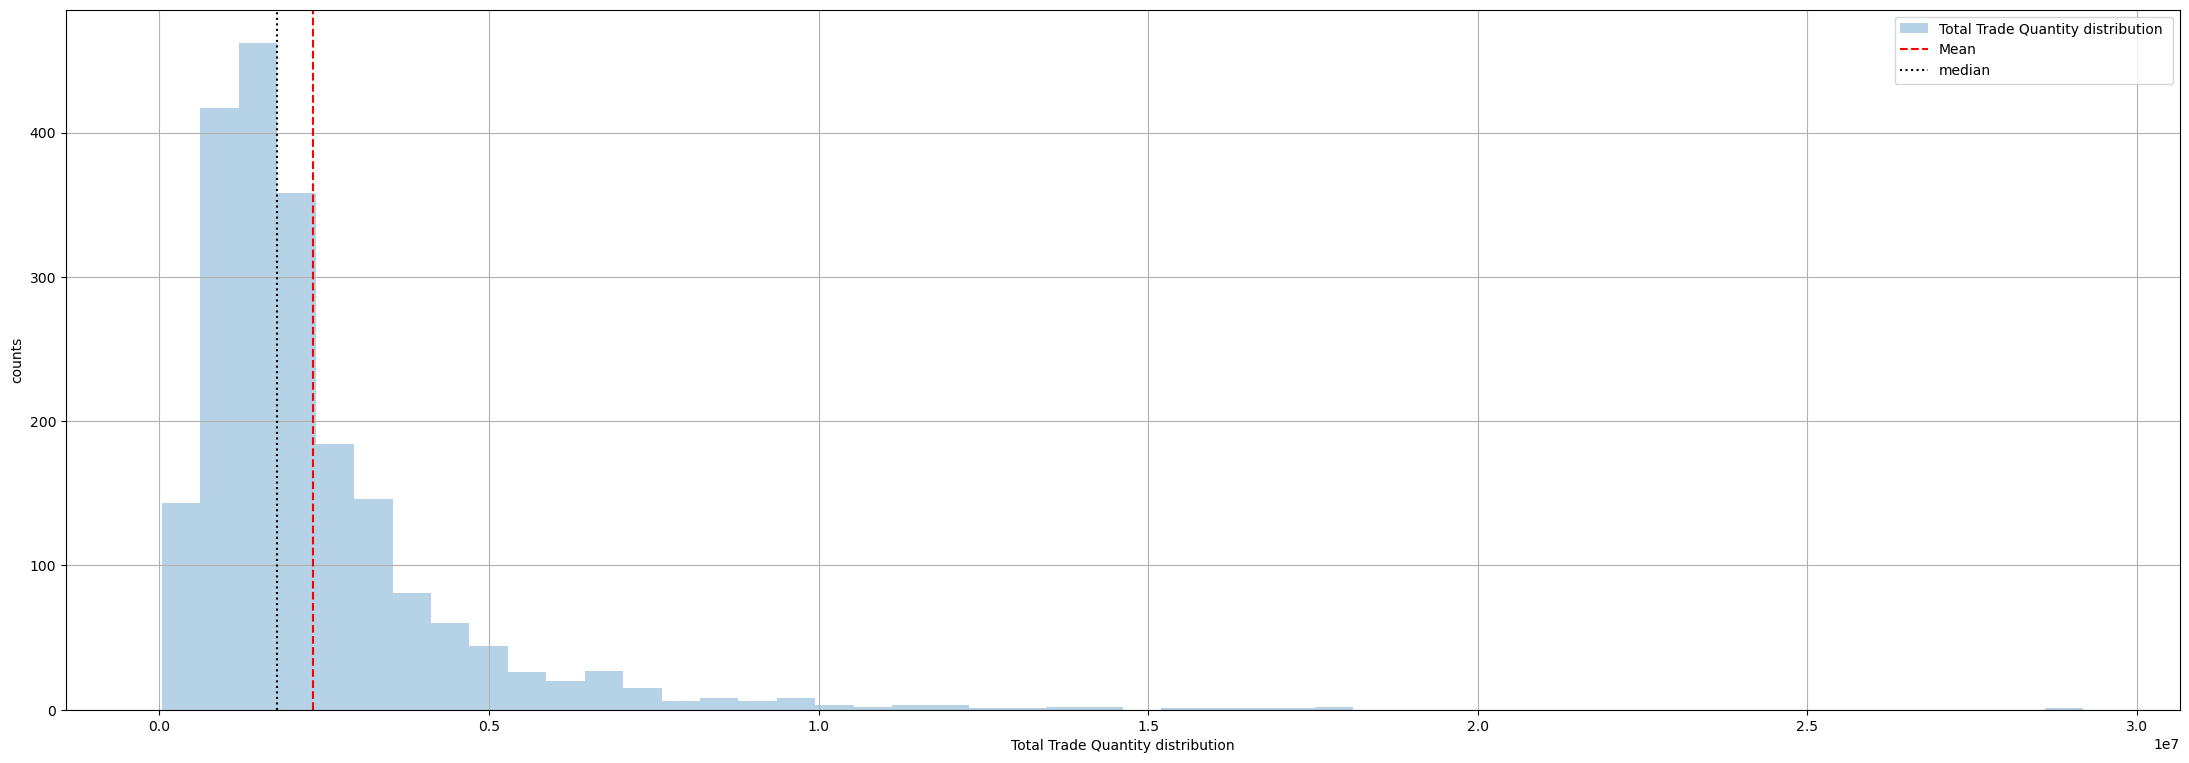

In [16]:
plt.figure(figsize=(60,20),facecolor='white',edgecolor='white',num=10)


plt.subplot(2,2,1)
data['Total Trade Quantity'].hist(bins=50,label='Total Trade Quantity distribution ',alpha=0.33)
plt.axvline(np.mean(data['Total Trade Quantity']),ls='--',c='r',label="Mean")
plt.axvline(np.median(data['Total Trade Quantity']),ls=':',c='black',label="median")


plt.ylabel('counts')
plt.xlabel('Total Trade Quantity distribution')
plt.legend()

<Axes: xlabel='Total Trade Quantity'>

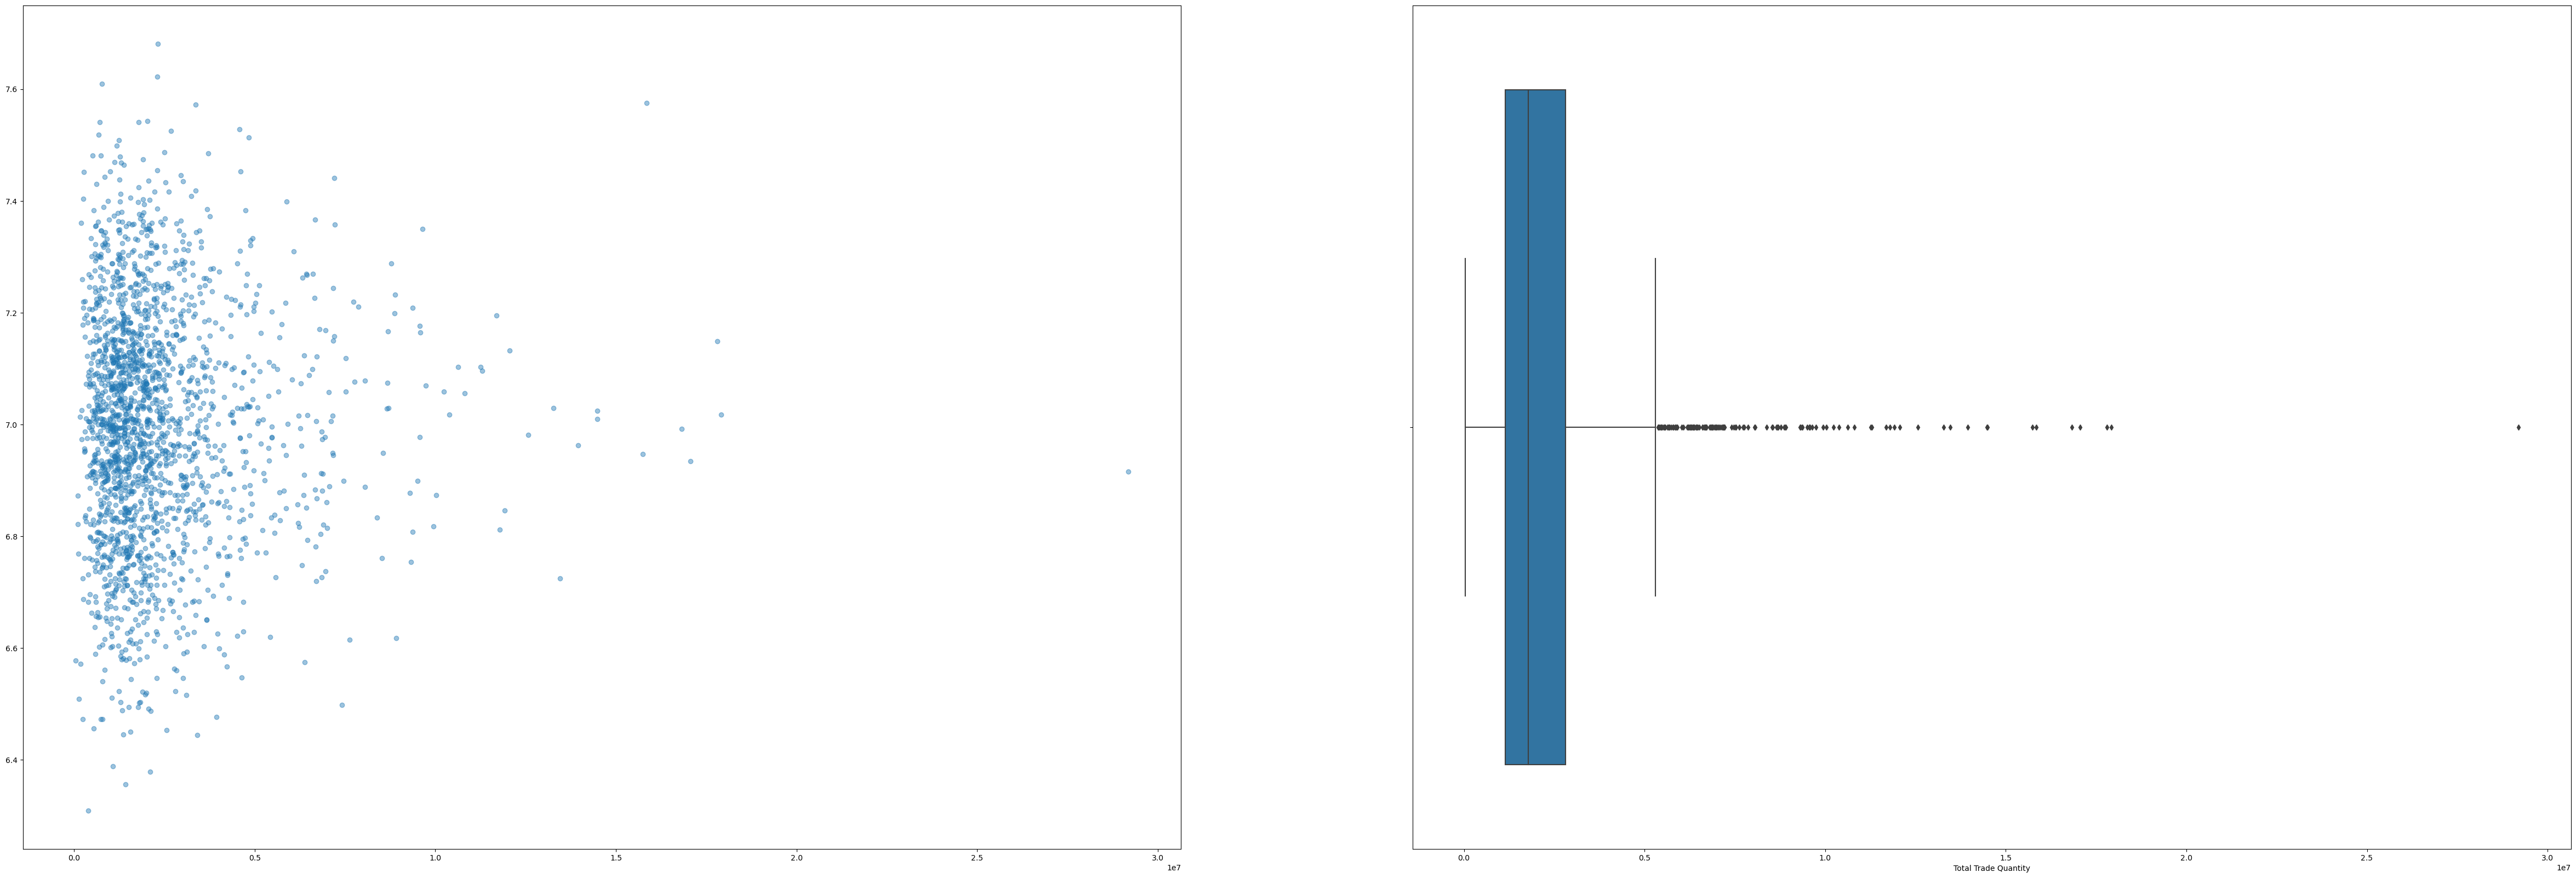

In [17]:
plt.figure(figsize=(60,20),facecolor='white',edgecolor='white',num=10)

plt.subplot(1,2,1)
plt.scatter(data['Total Trade Quantity'],np.random.normal(7,0.2,size=data.shape[0]),alpha=0.44)

plt.subplot(1,2,2)
sns.boxplot(x='Total Trade Quantity',data=data)

In [18]:
data['Close'].describe()

count    2035.00000
mean      149.45027
std        48.71204
min        80.95000
25%       120.05000
50%       141.25000
75%       156.90000
max       325.75000
Name: Close, dtype: float64

In [19]:
data['Close'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2035 entries, 0 to 2034
Series name: Close
Non-Null Count  Dtype  
--------------  -----  
2035 non-null   float64
dtypes: float64(1)
memory usage: 16.0 KB


# Removing Outliers 

In [20]:
# Quantiles : 
Q1 = data['Total Trade Quantity'].quantile(0.25)
Q3 = data['Total Trade Quantity'].quantile(0.75)
IQR = Q3 - Q1
print("Quantile 1 : ", Q1)
print("Quantile 3 : ", Q3)
print("IQR : ", IQR)

# Upper Quantile :
upper = Q3+1.5*IQR
print("Upper Quantile : ",upper)
# Lower Quantile : 
lower = Q1-1.5*IQR
print("Lower Quantile : ",lower)

Quantile 1 :  1146444.5
Quantile 3 :  2813594.0
IQR :  1667149.5
Upper Quantile :  5314318.25
Lower Quantile :  -1354279.75


In [21]:
upper_arr = np.where(data['Total Trade Quantity']>upper)[0]
lower_arr = np.where(data['Total Trade Quantity']<lower)[0]

print("Before Removing Outliers : ", data.shape)
data = data.drop(index=upper_arr)
data = data.drop(index=lower_arr)
print("After Removing Outliers : ", data.shape )

Before Removing Outliers :  (2035, 8)
After Removing Outliers :  (1896, 8)


Text(0.5, 1.0, "['Total Trade Quantity']")

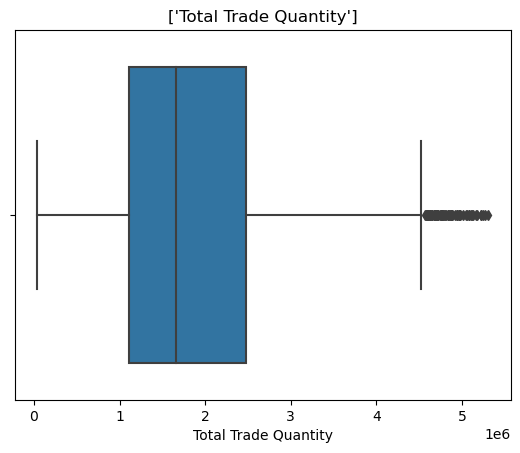

In [22]:
sns.boxplot(data=data,x=data['Total Trade Quantity'])
plt.title(["Total Trade Quantity"])

[Text(0, 0, 'Open'),
 Text(1, 0, 'High'),
 Text(2, 0, 'Low'),
 Text(3, 0, 'Last'),
 Text(4, 0, 'Close'),
 Text(5, 0, 'Total Trade Quantity'),
 Text(6, 0, 'Turnover (Lacs)')]

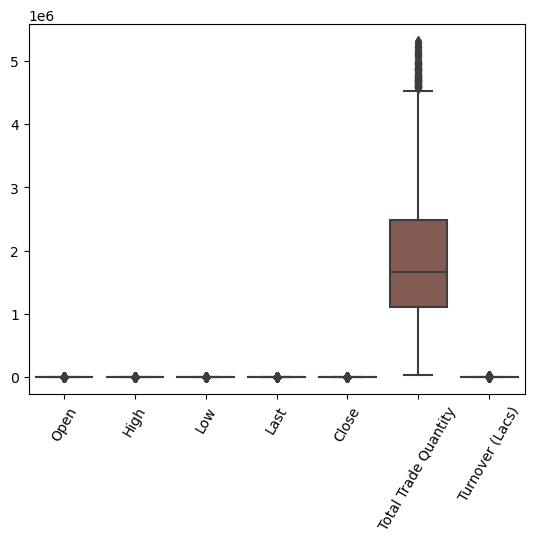

In [23]:
chart = sns.boxplot(data=data)
chart.set_xticklabels(chart.get_xticklabels(),rotation=60)

In [24]:
skewness = data['Close'].skew()
print(skewness)

1.7261639290062123


<Axes: xlabel='Close', ylabel='Density'>

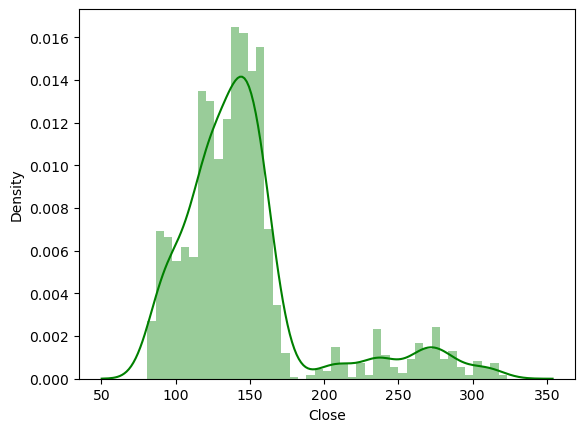

In [25]:
sns.distplot(data['Close'],color='g')

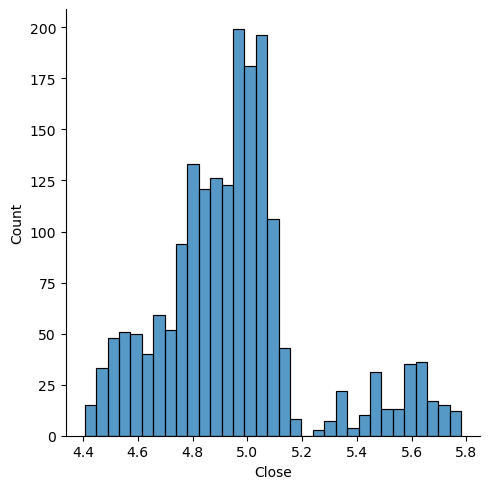

In [26]:
log_y = np.log1p(data['Close'])
sns.displot(log_y)

### Scalling

In [27]:
scaler = MinMaxScaler()
# Mix_max_scaling :
data["min_max_scaled"] = scaler.fit_transform(data['Total Trade Quantity'].values.reshape(-1,1))
# Standarization :
st_scaler = StandardScaler()
data['st_scaled'] = st_scaler.fit_transform(data['Total Trade Quantity'].values.reshape(-1,1))

print(data[['Total Trade Quantity','min_max_scaled','st_scaled']])

      Total Trade Quantity  min_max_scaled  st_scaled
0                  3069914        0.575308   1.063756
1                  5082859        0.957469   2.904318
2                  2240909        0.417920   0.305744
3                  2349368        0.438511   0.404915
4                  3423509        0.642439   1.387070
...                    ...             ...        ...
2030                586100        0.103752  -1.207352
2031                658440        0.117486  -1.141207
2032                281312        0.045888  -1.486038
2033                293312        0.048166  -1.475066
2034                658666        0.117529  -1.141000

[1896 rows x 3 columns]


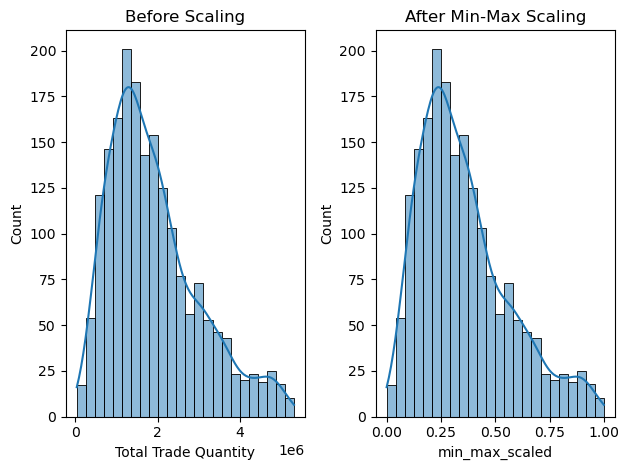

In [28]:
# Before Scaling
plt.subplot(1, 2, 1)
sns.histplot(data['Total Trade Quantity'], kde=True)
plt.title('Before Scaling')

# After Min-Max Scaling
plt.subplot(1, 2, 2)
sns.histplot(data['min_max_scaled'], kde=True)
plt.title('After Min-Max Scaling')

plt.tight_layout()
plt.show()

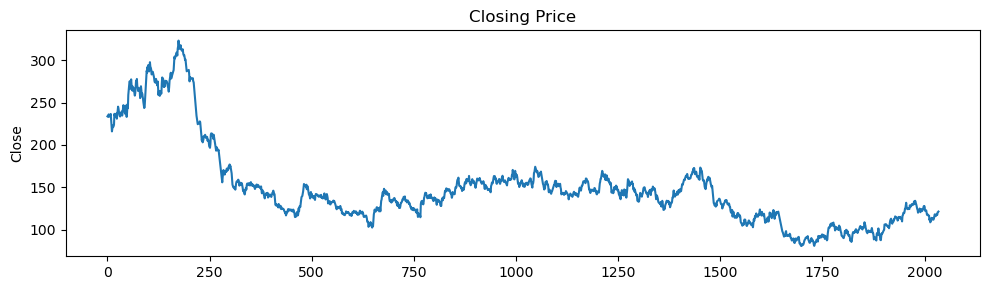

In [29]:
plt.figure(figsize=(10, 3))
data['Close'].plot()
plt.ylabel('Close')
plt.xlabel(None)
plt.title("Closing Price")

plt.tight_layout()

In [30]:
data.set_index('Date',inplace=True)

In [31]:
data.head()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs),min_max_scaled,st_scaled
Date,,,,,,,,,
2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35,0.575308,1.063756
2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95,0.957469,2.904318
2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60,0.417920,0.305744
2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90,0.438511,0.404915
2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55,0.642439,1.387070


In [32]:
data.corr()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs),min_max_scaled,st_scaled
Open,1.000000,0.999373,0.998968,0.998284,0.998355,0.449740,0.769881,0.449740,0.449740
High,0.999373,1.000000,0.999163,0.999271,0.999316,0.458896,0.776549,0.458896,0.458896
Low,0.998968,0.999163,1.000000,0.999370,0.999440,0.443922,0.766081,0.443922,0.443922
Last,0.998284,0.999271,0.999370,1.000000,0.999961,0.453662,0.773059,0.453662,0.453662
Close,0.998355,0.999316,0.999440,0.999961,1.000000,0.453268,0.772602,0.453268,0.453268
Total Trade Quantity,0.449740,0.458896,0.443922,0.453662,0.453268,1.000000,0.881089,1.000000,1.000000
Turnover (Lacs),0.769881,0.776549,0.766081,0.773059,0.772602,0.881089,1.000000,0.881089,0.881089
min_max_scaled,0.449740,0.458896,0.443922,0.453662,0.453268,1.000000,0.881089,1.000000,1.000000
st_scaled,0.449740,0.458896,0.443922,0.453662,0.453268,1.000000,0.881089,1.000000,1.000000


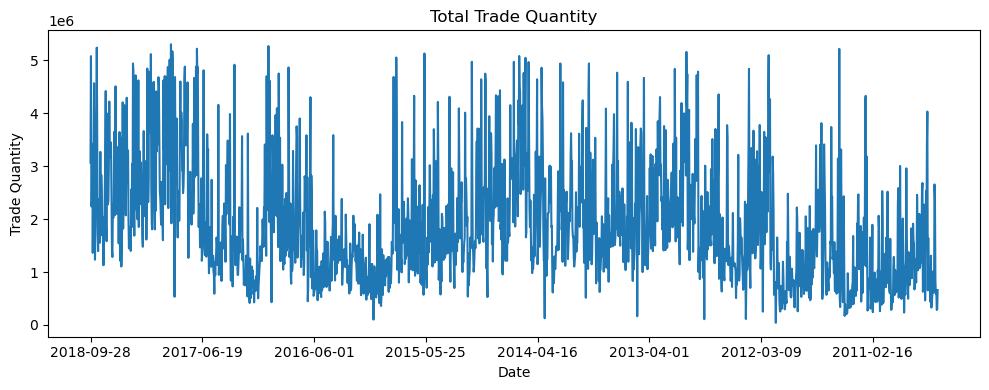

In [33]:
plt.figure(figsize=(10,4))

plt.subplot(1,1,1)
data['Total Trade Quantity'].plot()
plt.ylabel('Trade Quantity')
plt.title('Total Trade Quantity')

plt.tight_layout()

array([[<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
        <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
        <Axes: xlabel='Date'>],
       [<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
        <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
        <Axes: xlabel='Date'>],
       [<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
        <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
        <Axes: xlabel='Date'>],
       [<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
        <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
        <Axes: xlabel='Date'>],
       [<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
        <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
        <Axes: xlabel='Date'>]], dtype=object)

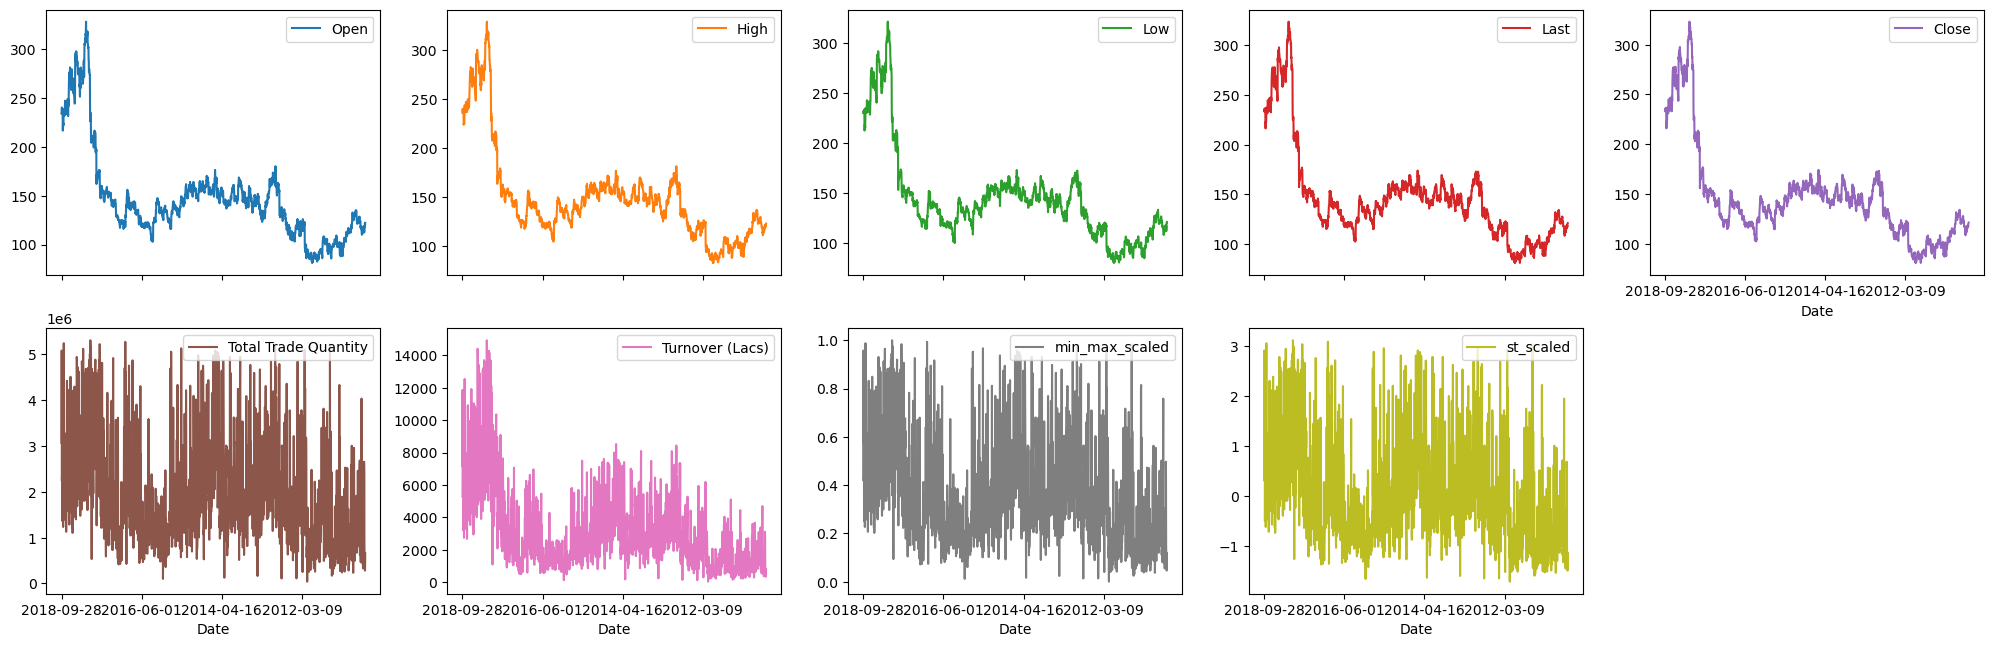

In [34]:
data.plot(kind='line',subplots=True,figsize=(25,20),layout=(5,5),use_index=True)

In [35]:
mov_avg_day = [10,20,50,100]

for ma in mov_avg_day:
    column_name = f"MA {ma} Days"
    data[column_name] = data['Close'].rolling(ma).mean()

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1896 entries, 2018-09-28 to 2010-07-21
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Open                  1896 non-null   float64
 1   High                  1896 non-null   float64
 2   Low                   1896 non-null   float64
 3   Last                  1896 non-null   float64
 4   Close                 1896 non-null   float64
 5   Total Trade Quantity  1896 non-null   int64  
 6   Turnover (Lacs)       1896 non-null   float64
 7   min_max_scaled        1896 non-null   float64
 8   st_scaled             1896 non-null   float64
 9   MA 10 Days            1887 non-null   float64
 10  MA 20 Days            1877 non-null   float64
 11  MA 50 Days            1847 non-null   float64
 12  MA 100 Days           1797 non-null   float64
dtypes: float64(12), int64(1)
memory usage: 207.4+ KB


In [37]:
data.head()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs),min_max_scaled,st_scaled,MA 10 Days,MA 20 Days,MA 50 Days,MA 100 Days
Date,,,,,,,,,,,,,
2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35,0.575308,1.063756,NaN,NaN,NaN,NaN
2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95,0.957469,2.904318,NaN,NaN,NaN,NaN
2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60,0.417920,0.305744,NaN,NaN,NaN,NaN
2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90,0.438511,0.404915,NaN,NaN,NaN,NaN
2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55,0.642439,1.387070,NaN,NaN,NaN,NaN


In [38]:
data.isnull().sum()

Open                     0
High                     0
Low                      0
Last                     0
Close                    0
Total Trade Quantity     0
Turnover (Lacs)          0
min_max_scaled           0
st_scaled                0
MA 10 Days               9
MA 20 Days              19
MA 50 Days              49
MA 100 Days             99
dtype: int64

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1896 entries, 2018-09-28 to 2010-07-21
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Open                  1896 non-null   float64
 1   High                  1896 non-null   float64
 2   Low                   1896 non-null   float64
 3   Last                  1896 non-null   float64
 4   Close                 1896 non-null   float64
 5   Total Trade Quantity  1896 non-null   int64  
 6   Turnover (Lacs)       1896 non-null   float64
 7   min_max_scaled        1896 non-null   float64
 8   st_scaled             1896 non-null   float64
 9   MA 10 Days            1887 non-null   float64
 10  MA 20 Days            1877 non-null   float64
 11  MA 50 Days            1847 non-null   float64
 12  MA 100 Days           1797 non-null   float64
dtypes: float64(12), int64(1)
memory usage: 207.4+ KB


In [40]:
data.dropna(axis=0,inplace=True)

In [41]:
data.head()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs),min_max_scaled,st_scaled,MA 10 Days,MA 20 Days,MA 50 Days,MA 100 Days
Date,,,,,,,,,,,,,
2018-04-20,285.95,288.80,283.65,286.00,286.30,2523492,7225.36,0.471569,0.564128,289.020,278.9475,271.267,254.7390
2018-04-19,286.00,288.65,283.60,285.55,286.20,2434183,6966.56,0.454613,0.482467,288.860,280.5325,271.486,255.2635
2018-04-18,282.30,287.45,279.25,285.35,284.10,4719061,13416.32,0.888401,2.571675,288.605,282.2275,271.842,255.7720
2018-04-16,274.00,280.20,272.55,279.40,279.65,3030999,8371.24,0.567920,1.028173,287.295,283.8525,272.010,256.2260
2018-04-13,274.00,277.35,271.75,275.70,275.50,2196800,6024.34,0.409546,0.265413,285.090,285.4500,271.974,256.6200


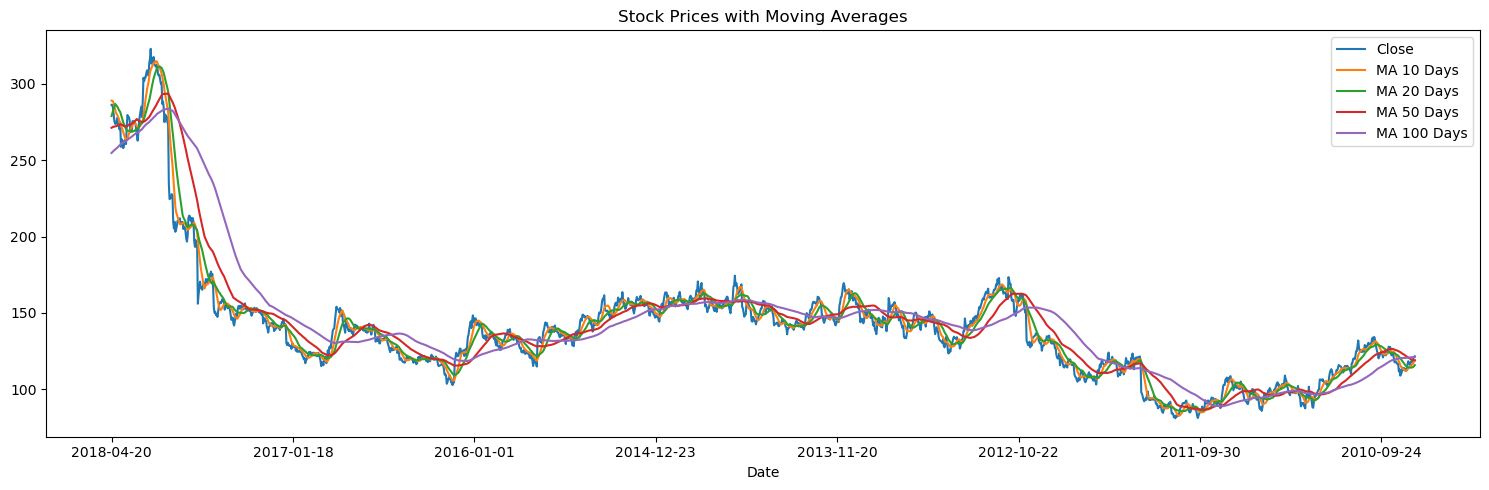

In [42]:
fig, axes = plt.subplots(nrows=1,ncols=1)
fig.set_figheight(5)
fig.set_figwidth(15)

data[['Close','MA 10 Days', 'MA 20 Days','MA 50 Days','MA 100 Days']].plot(ax=axes)
axes.set_title('Stock Prices with Moving Averages')

plt.tight_layout()
plt.show()